In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [3]:
df = pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [4]:
df.shape

(250, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       250 non-null    float64
 1   1       250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [6]:
df.describe()

,0,1
count,250.000000,250.000000
mean,0.126630,2.957091
std,2.704501,2.463476
min,-5.888766,-5.409809
25%,-2.067694,1.394351
50%,0.413196,2.810804
75%,1.705562,4.977583
max,9.399157,9.548513


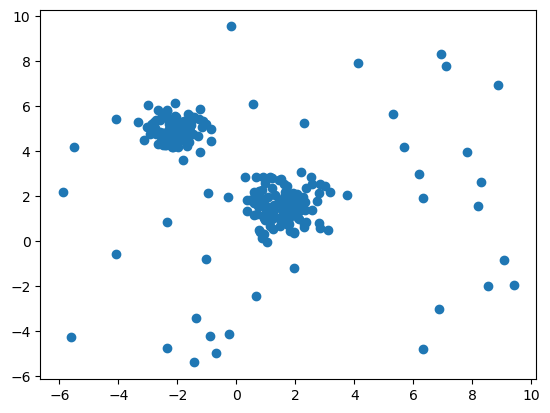

In [7]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

## IsolationForest

In [8]:
clf = IsolationForest(contamination = 0.1)

In [9]:
clf.fit(df)

IsolationForest(contamination=0.1)

In [10]:
predictions = clf.predict(df)

In [11]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [12]:
index = np.where(predictions < 0)
index

(array([ 20,  45,  48,  53,  55,  72,  74,  78,  85,  87,  92, 108, 119,
        130, 133, 141, 151, 167, 179, 212, 220, 221, 227, 242, 247]),)

In [13]:
x = df.values

In [14]:
x

array([[ 1.61667145,  1.94452201],
       [ 1.2564615 ,  1.60944428],
       [-2.34391881,  4.3929613 ],
       [ 1.19539251,  2.79448461],
       [-3.32958612,  5.30315976],
       [ 1.6241983 ,  1.21875334],
       [ 0.45611969,  1.80757419],
       [ 0.62304325,  2.04424325],
       [-2.05908202,  4.6599109 ],
       [ 2.16307638,  1.39149293],
       [-2.13386677,  4.43599433],
       [-1.65311342,  4.92021328],
       [ 0.75047316,  2.23811621],
       [-1.71073925,  5.17482723],
       [ 0.86102444,  2.2819114 ],
       [-1.86274182,  4.55454246],
       [ 1.48027244,  1.79983231],
       [ 1.45223088,  2.69933991],
       [-1.65509092,  5.65092311],
       [ 1.22887123,  1.28838807],
       [ 9.39915672, -1.97148327],
       [ 2.04025339,  2.07645291],
       [ 0.890442  ,  1.09480523],
       [-2.35235014,  5.47163036],
       [ 0.56612677,  6.08881822],
       [-2.38207196,  4.28110426],
       [-2.57809122,  5.39059905],
       [-1.92902342,  4.84033579],
       [-2.40668213,

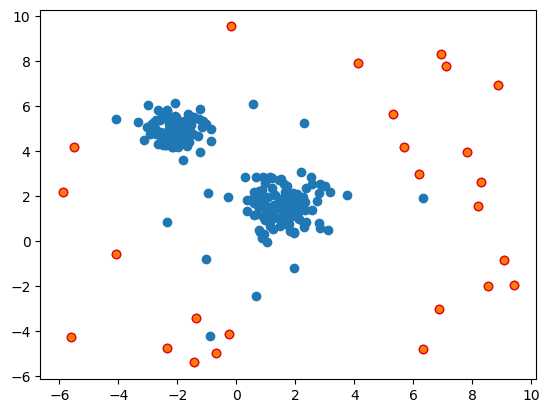

In [15]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors = 'r')

## DBSCAN

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_circles

In [17]:
X,y = make_circles(n_samples=1000,noise = 0.1,factor= 0.3)

In [18]:
X

array([[ 0.3439006 , -0.8992196 ],
       [ 0.35809895, -1.06563335],
       [-0.3230418 , -0.02656841],
       ...,
       [ 0.6437827 , -0.77927315],
       [ 1.0444984 ,  0.48497195],
       [ 0.0889719 , -0.10034377]])

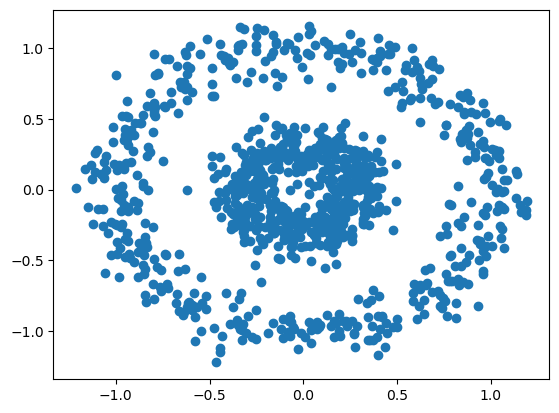

In [19]:
plt.scatter(X[:,0],X[:,1])

In [20]:
dbscan = DBSCAN(eps = 0.1)

In [21]:
dbscan.fit_predict(X)

array([ 0,  0,  1,  2,  3,  1,  3,  1,  2,  1,  3,  2,  2,  2,  2, -1,  3,
        1,  0,  3,  1,  2,  1,  2,  1,  1,  1,  2,  1,  1,  2,  1,  0,  3,
        1,  2,  1,  2,  1,  1,  3,  1,  2, -1,  1,  1,  1,  3,  3, -1,  1,
        2,  1,  3,  1,  3,  0,  2,  1,  1,  1,  3,  2,  1,  1,  3,  1,  3,
        1,  2,  3,  1,  1,  0,  2,  3,  2,  2,  1,  2,  3,  3,  1,  1,  3,
        2,  1,  0,  1,  1,  1,  1,  3,  1,  0,  3, -1,  1,  1,  1,  3,  1,
        1,  1, -1,  1,  3,  3,  1,  1,  2,  3,  0,  0,  3,  1,  3,  1,  1,
        1,  3,  1,  2,  1,  3,  1,  1,  0,  2,  3,  0,  1, -1, -1,  1,  3,
        2,  1,  1,  0,  3,  1,  1,  1,  3,  3,  1,  2,  3,  3,  2, -1,  2,
        0,  3,  1,  1,  3,  0,  1,  0,  1,  3,  1,  1,  1,  1,  2,  1,  3,
        3,  0,  3,  1,  1,  3,  1,  3,  3,  1,  1,  1,  3,  2,  0,  0,  1,
        1,  2,  3,  1,  1,  1,  2,  3,  1,  1,  2,  2, -1,  3,  1,  0,  2,
        3,  1,  1,  1,  0, -1,  1,  1,  2,  1,  3,  2,  1,  3,  1,  1,  2,
        2,  1,  1,  2,  1

In [22]:
dbscan.labels_

array([ 0,  0,  1,  2,  3,  1,  3,  1,  2,  1,  3,  2,  2,  2,  2, -1,  3,
        1,  0,  3,  1,  2,  1,  2,  1,  1,  1,  2,  1,  1,  2,  1,  0,  3,
        1,  2,  1,  2,  1,  1,  3,  1,  2, -1,  1,  1,  1,  3,  3, -1,  1,
        2,  1,  3,  1,  3,  0,  2,  1,  1,  1,  3,  2,  1,  1,  3,  1,  3,
        1,  2,  3,  1,  1,  0,  2,  3,  2,  2,  1,  2,  3,  3,  1,  1,  3,
        2,  1,  0,  1,  1,  1,  1,  3,  1,  0,  3, -1,  1,  1,  1,  3,  1,
        1,  1, -1,  1,  3,  3,  1,  1,  2,  3,  0,  0,  3,  1,  3,  1,  1,
        1,  3,  1,  2,  1,  3,  1,  1,  0,  2,  3,  0,  1, -1, -1,  1,  3,
        2,  1,  1,  0,  3,  1,  1,  1,  3,  3,  1,  2,  3,  3,  2, -1,  2,
        0,  3,  1,  1,  3,  0,  1,  0,  1,  3,  1,  1,  1,  1,  2,  1,  3,
        3,  0,  3,  1,  1,  3,  1,  3,  3,  1,  1,  1,  3,  2,  0,  0,  1,
        1,  2,  3,  1,  1,  1,  2,  3,  1,  1,  2,  2, -1,  3,  1,  0,  2,
        3,  1,  1,  1,  0, -1,  1,  1,  2,  1,  3,  2,  1,  3,  1,  1,  2,
        2,  1,  1,  2,  1

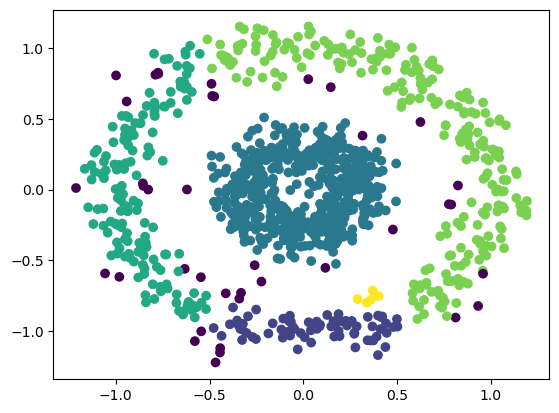

In [23]:
plt.scatter(X[:,0],X[:,1],c = dbscan.labels_)

## Local Outlier Factor

In [24]:
from sklearn.neighbors import LocalOutlierFactor

In [25]:
X

array([[ 0.3439006 , -0.8992196 ],
       [ 0.35809895, -1.06563335],
       [-0.3230418 , -0.02656841],
       ...,
       [ 0.6437827 , -0.77927315],
       [ 1.0444984 ,  0.48497195],
       [ 0.0889719 , -0.10034377]])

In [26]:
lof = LocalOutlierFactor(n_neighbors=5, contamination='auto')

In [27]:
y_pred = lof.fit_predict(X)

In [28]:
outliers = y_pred == -1
inliers = y_pred == 1

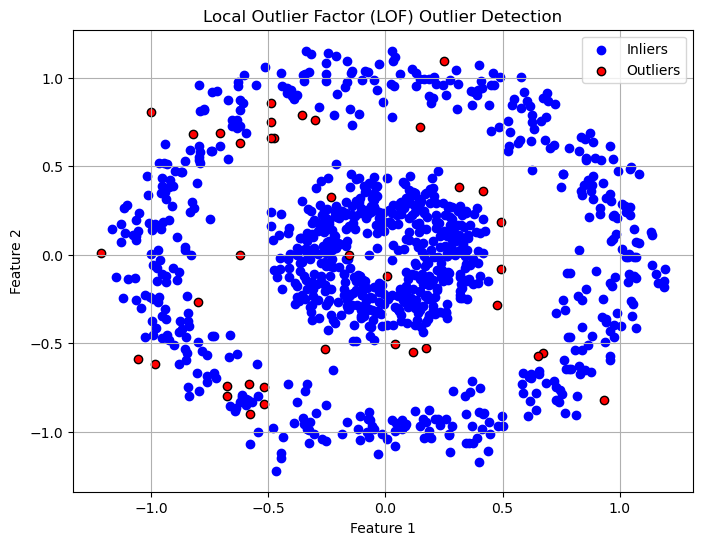

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X[inliers, 0], X[inliers, 1], color='blue', label='Inliers')
plt.scatter(X[outliers, 0], X[outliers, 1], color='red', label='Outliers', edgecolor='k')
plt.title("Local Outlier Factor (LOF) Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()